# Tick 1: numpy

In this tick we'll implement a simple epidemic simulator.

In our simulator, each person's state is either **S**usceptible, or **I**nfected, or **P**rotected (protected either by vaccine or by having recovered from infection). We will implement an *agent-based simulator* in which we keep track of the state of every person; this is in contrast to aggregate equation-based simulators in which we only keep track of the total number of people in each state.

Our simulator will be a discrete-time simulator, one timestep per day. Each day,

1. Each person chooses to socialize (with probability `prob_socialize`) or to isolate.
1. The people who chose to socialize are randomly grouped into pairs.
1. Within each pair, if one is **I**nfected and the other not, then the other might become **I**nfected. The probability of infection is either `prob_infect_susceptible` or `prob_infect_protected` depending on their state.
1. At the end of the day, each person who was **I**nfected at the start of the day recovers with probability `prob_recover`, and become **P**rotected.

A simple probability calculation shows that the average number of days a person is **I**nfected is `days = 1/prob_recover`. The average number of people that a single infected individual would infect during the course of their infection, in an entirely **S**usceptible population, is *R*<sub>0</sub>&nbsp;=&nbsp;`days * prob_socialize * prob_infect_susceptible`.

In tick 1a we will use this simulator to look at how vaccination rate affects the *R* number. Then in tick 1b we'll modify the simulator slightly, to use location-based grouping rather than random grouping, in order to see how restricting travel affects the *R* number.

<div class="alert alert-warning">This assignment tests your vectorized thinking. You will be asked to run simulations on a population of tens of thousands of individuals. <strong>YOUR CODE MUST USE NUMPY VECTORIZED OPERATIONS</strong> to iterate over the population. Do not use Python 'for' loops or list comprehensions, and do not use <code style="background-color:inherit">np.vectorize</code> either. For any other iteration, e.g. over simulated timesteps, or over simulation parameters, it's a good idea to use 'for' loops or list comprehension.
</div>

### Thoughts about modelling

This epidemic simulator is a very simple model!

There are all sorts of ways we might make it more complex: we could allow larger groups, and multiple interactions per day; we could imagine that each person has their own proclivities for socializing and group size; we could allow infectivity to vary from person to person or day to day; and so on. But it's generally not a good idea to make a model more complex than it has to be to answer the question at hand. The more complex the model, the more parameters there are to pick values for, and the harder it is to (a) fit the parameters to the real world, (b) come up with a useful answer. And a great deal of useful real-world epidemiology is done with even simpler models, namely aggregate equation-based simulators.

Our simulator is just about the simplest possible simulator that will let us investigate the question of restricting travel. The goal of a simple simulator like this isn't to make precise numerical forecasts. It's to learn qualitatively which factors are important and which factors are unimportant &mdash; in other words, to learn which factors it would be useful to incorporate into a more complex simulator and which factors we can leave out.

### How to submit answers using the autograder

Each question comes with instructions on how to submit your answer. 
Here's a video explanation, if you prefer videos.

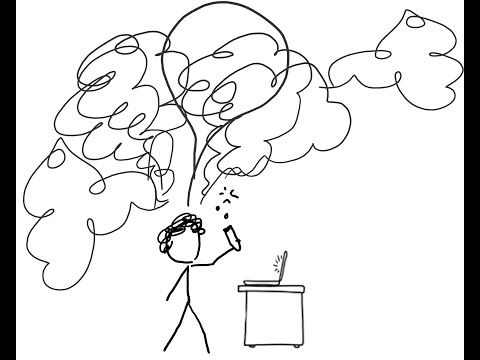

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('2Tud7FXhYP4', width=560, height=315, start=303)

### Tips on how to structure your notebooks

You should follow Marie Kondo's advice: "If a line of code does not spark joy, delete it."

You are free to structure your code however you like &mdash; you don't have to 
give your functions the names and arguments that this notebook describes. Indeed, as you 
declutter your notebook, you may find it helpful to rewrite it as a single simulator function
that can be used for both tick 1a and 1b.

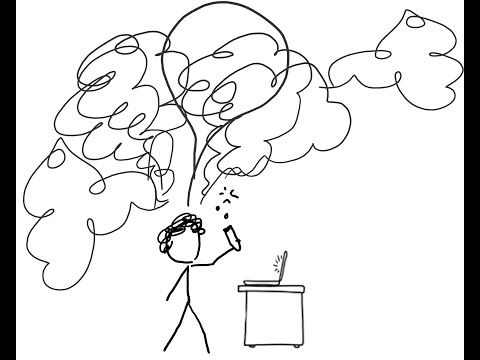

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('2Tud7FXhYP4', width=560, height=315, start=490)

<div style="width:100%; background-color:rgb(100,105,120); width:100%; height:.2em; margin-top:10em"></div>

# Tick 1a - worth 1 mark

**Question (q1).** The model needs us to randomly group the people who socialize into pairs. Suppose there are $M$ of them. We can group them into pairs 
as follows. First, randomly permuting the vector $[0,1,\dots,M-1]$. Let `m1` consist of the first $M//2$ items and `m2` consist of the next $M//2$ items. Interpret this as "`m1[i]` is paired with `m2[i]`". We're using $M//2$ rather than $M/2$ in case $M$ is odd, in which case there's one person left over who doesn't join in a pair.

Write a function `pairs(M)` that returns the tuple `(m1,m2)`. For example if you run `pairs(6)` you might get the output
```
(array[(3, 0, 1)], array([2, 4, 5]))
```

To submit your answer,
```python
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp')
GRADER1a = GRADER.subsection('tick1a')
q = GRADER1a.fetch_question('q1')
m1,m2 = pairs(q.n)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER1a.submit_answer(q, ans)
```

**Question (q2).** Let `popn` be a vector with one entry per person in the population, with values `0` for **S**usceptible, `1` for **P**rotected, `2` for **I**nfected. Write a function `is_exposed(popn, m1, m2)` which returns a boolean vector of the same length as `popn`, indicating whether each person was in a group with an **I**nfected person. For example,
```
is_exposed(np.array([0,0,2,0,0,1]), np.array([3,0,1]), np.array([2,4,5]))
```
should return
```
array([False, False,  True,  True, False, False])
```

To submit your answer,
```python
q = GRADER1a.fetch_question('q2')
ans = is_exposed(q.popn, q.m1, q.m2)
GRADER1a.submit_answer(q, ans)
```

**Question (q3).** Write a function `update(popn, prob)` to simulate one day. Here `prob` is a dictionary, e.g.
```
prob = {'socialize': 0.8, 'infect_susceptible': 0.6, 'infect_protected': 0.1, 'recover': 0.1}
```
Your function should return a pair `(popn, new_infected)` where `popn` is the updated population vector and `new_infected` is the number of people who became infected this day.

To submit your answer,
```python
q = GRADER1a.fetch_question('q3')
popn = np.where(np.arange(q.n) < q.i0, 2, 0)
popn2,new_infected = update(popn, q.prob)
ans = {'i':np.sum(popn2==2), 'ni':new_infected}
GRADER1a.submit_answer(q, ans)
```

**Question (q4).** Write a function `sim(N, T, i0, p0, prob)` to simulate `T` days on a population of size `N`, of whom `i0` are **I**nfected and `p0` are **P**rotected at the beginning of day 0. It should return a matrix with `T` rows and 4 columns. The four columns of row $i$ should be (1) the number of
**S**usceptible, (2) **P**rotected, and (3) **I**nfected people at the end of day $i$, as well as (4) the number of new infections that day.

To submit your answer,
```python
q = GRADER1a.fetch_question('q4')
x = sim(N=q.N, T=q.T, i0=q.i0, p0=q.p0, prob=q.prob)
ans = x[-1,1] / q.N
GRADER1a.submit_answer(q, ans)
```

<div class="alert alert-warning">The autograder does NOT verify that your code is correct. It's entirely possible to have buggy code that passes (q3) but fails (q4). It's your job to do your own testing!
</div>

**Question (q5).** Simulate a population of `N=50000` over `T=200` days with `i0=100` and `p0=30000`, with the probabilities as in question (q3). Plot the percentage of the population in each of the three states, with day number on the horizontal axis. Also plot the number of new infections each day.

*You don't have to submit your plot to the autograder, but you must include it in your submitted notebook. Your plots should look something like this. In your plots, you should pay attention to (1) making sure the two plots share the same x-axis, (2) colouring the lines and showing a legend. Don't worry about fine-grained control of the plot, such as legend placement or plot size or colour schemes.*

<img src="res/tick1_sim.svg" style="width:30em"/>

**Question (q6).** Repeat the simulation from question (q5), but with `p0=0`, with `p0=15000`, and with `p0=30000`. Run five simulations at each value of `p0`. Plot the percentage of the population infected.

*Again, you don't have to submit your plot to the autograder, but you must include it in your submitted notebook. Your plots should look something like this.*

<img src="res/tick1_p0.svg" style="width:30em"/>

<div style="width:100%; background-color:rgb(100,105,120); width:100%; height:.2em; margin-top:5em"></div>

# Tick 1b - worth 1 mark

**Question (q7).** A simple way to estimate the _R_ number is `R=days*N/D` where `N` is the total number of new infections in a window of time, where `D` is total number of infected-person-days, i.e. what you get by summing the number of infected people at the *start* of each day in the window, and 
where
`days=1/prob_recover` is the average number of days a person is infected.
Write a function 
```python
r(x, t0, t1, days)
```
to compute the _R_ number, where `x` is the matrix produced by your simulator, and `N` and `D` are computed over days `t0,t0+1,...,t1-1`.

To submit your answer,
```python
GRADER1b = GRADER.subsection('tick1b')
q = GRADER1b.fetch_question('q7')
ans = r(np.array(q.x), t0=q.t0, t1=q.t1, days=q.days)
GRADER1b.submit_answer(q, ans)
```

**Question (q8).** Compute the average *R* number for each of the three scenarios in question (q6), averaged over the five simulation runs, over the window `t0=7, t1=14`.

*There is nothing to submit for this question. You code should produce these answers:*

| `p0` | *R* |
| --- | --- |
|0     |   4.37 |
|15000 |   3.45 |
|30000 |   2.43 |

**Question (q9).** In these simulations, the epidemic grows exponentially, reaches a peak, then dies down. In the UK however, over summer 2021, COVID levels seemed to reach a level and fluctuate around that level. What might explain this? One possible answer is that it's due to limiting social interactions: if people mainly socialize in a small social circle, then the epidemic will burn through the population steadily rather than explosively &mdash; like a candle rather than like gunpowder.

Write a function `localpairs(M, σ)` which works as follows. Let each person $i$ go to location $i + X_i$ where $X_i$ is a Gaussian random variable with mean 0 and standard deviation `σ`. (Such a random variable can be generated using `np.random.normal(loc=0, scale=σ)`. Generate new random variables each day.) Then sort people in order of location. The first two people in this sorted list form a pair, the second two form a pair, and so on. Thus, if `σ` is small then people will mostly socialize with the same people, and if `σ` is very large then it will be like the full random mixing from tick 1a.

To submit your answer,
```python
q = GRADER1b.fetch_question('q9')
m1,m2 = localpairs(q.n, q.σ)
ans = {'n': len(np.unique(np.concatenate([m1,m2]))), 's': np.std(np.abs(m1-m2))}
GRADER1b.submit_answer(q, ans)
```

**Question (q10).** Modify the simulator to use `localpairs`. Run simulations with the same parameters as in question (q5) but with `p0=0` and `σ` either 5, or 20, or 100. Run five simulations for each value of `σ`. Plot the percentage of the population infected.

*Again, you don't have to submit your plot to the autograder, but you must include it in your submitted notebook. Your plots should look something like this.*

<img src="res/tick1_sigma.svg" style="width:30em"/>

**Question (q11).** Compute the *R* number for a simulation run.

To submit your answer,
```python
q = GRADER1b.fetch_question('q11')
x = sim_with_locality(N=q.N, T=q.t1, i0=q.i0, p0=q.p0, prob=q.prob, σ=q.σ)
ans = r(x, t0=q.t0, t1=q.t1, days=1/q.prob['recover'])
GRADER1b.submit_answer(q, ans)
```